<img src="https://shwetkm.github.io/upxlogo.png"></img>

# Exploratory Data Analysis using Python(Part 01) - Data Science Foundation


**SET THE WORKING DIRECTORY SO THAT WE DO NOT HAVE TO THINK ABOUT PATH PROBLEMS**

Please ensure all your folder names <font color='red'><b>do not have a space & use forward slash (/)</b></font>

In [32]:
your_local_path="C:/Users/tejks/Desktop/ML/practice/"

**Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is a crucial step of the data analytics process. It involves exploring the data and identifying important features about the data as well as asking interesting questions from the data by using statistical and visualization tools studied in earlier classes such as descriptive statistics and basic plotting. Entire aim of exploratory data analysis is to be able to get familiar with the data, perform data munging and manipulation, and ask questions before trying to forecast and run Machine Learning models on the data.

Dataset: In the first example, the dataset that we consider is data on countries and their territories. Specifically, we would using data files for TB Deaths, spread of TB, and number of new cases of TB to answer some important questions. 

In any data analysis process, there is one or more questions we want to answer. That is the most basic and important step in the whole process, to define these questions. Since we are going to perform some Exploratory Data Analysis in our TB dataset, these are the questions we want to answer:

<p>Which are the countries with the highest and infectious TB incidence?</p>
<p>What is the general world tendency in the period from 1990 to 2007?</p>
<p>What countries don't follow that tendency?</p>
<p>What other facts about the disease do we know that we can check with our data?</p>

In [33]:
import urllib.request

tb_deaths_url_csv = 'https://docs.google.com/spreadsheets/d/12uWVH_IlmzJX_75bJ3IH5E-Gqx6-zfbDKNvZqYjUuso/pub?gid=0&output=CSV'
tb_existing_url_csv = 'https://docs.google.com/spreadsheets/d/1X5Jp7Q8pTs3KLJ5JBWKhncVACGsg5v4xu6badNs4C7I/pub?gid=0&output=csv'
tb_new_url_csv = 'https://docs.google.com/spreadsheets/d/1Pl51PcEGlO9Hp4Uh0x2_QM0xVb53p2UDBMPwcnSjFTk/pub?gid=0&output=csv'

local_tb_deaths_file = your_local_path+'tb_deaths_100.csv'
local_tb_existing_file = your_local_path+'tb_existing_100.csv'
local_tb_new_file = your_local_path+'tb_new_100.csv'

#Copy the network objects denoted by URLs to local files
urllib.request.urlretrieve(tb_deaths_url_csv, local_tb_deaths_file)
urllib.request.urlretrieve(tb_existing_url_csv, local_tb_existing_file)
urllib.request.urlretrieve(tb_new_url_csv, local_tb_new_file)


('C:/Users/tejks/Desktop/ML/practice/tb_new_100.csv',
 <http.client.HTTPMessage at 0xba6b940>)

In [35]:
import pandas as pd
import numpy as np

deaths_df = pd.read_csv(local_tb_deaths_file, index_col = 0, thousands=',').T

existing_df = pd.read_csv(local_tb_existing_file, index_col = 0, thousands=',').T
#print (existing_df)
new_df = pd.read_csv(local_tb_new_file, index_col = 0, thousands=',').T
existing_df.head()

"TB prevalence, all forms (per 100 000 population per year)",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Rep.",Cook Islands,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Cote d'Ivoire,"Korea, Dem. Rep.","Congo, Dem. Rep.",Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libyan Arab Jamahiriya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,"Micronesia, Fed. Sts.",Monaco,Mongolia,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,Netherlands Antilles,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,"Korea, Rep.",Moldova,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,"Macedonia, FYR",Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,Tanzania,Virgin Islands (U.S.),United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990,436,42,45,42,39,514,38,16,96,52,7,18,58,54,120,639,8,62,16,65,140,10,924,377,160,344,124,32,91,43,179,288,928,188,7,449,10,318,251,45,327,88,188,209,0,30,126,32,14,22,292,841,275,12,1485,24,183,282,48,133,169,245,50,312,68,14,21,67,359,350,51,15,533,30,7,103,113,241,404,39,479,141,67,5,586,443,50,88,19,11,11,10,62,19,95,125,1026,89,90,428,56,64,225,476,46,64,19,367,380,159,143,640,10,585,53,101,263,3,477,14,134,287,411,650,170,629,11,28,112,10,145,317,282,118,142,8,40,430,96,74,498,95,394,799,88,51,17,71,223,105,118,69,190,17,26,45,36,9,346,68,380,113,465,52,55,66,625,597,769,44,109,409,109,629,5,14,94,193,336,92,706,702,139,45,17,49,83,105,42,593,206,67,47,9,215,30,7,35,114,278,46,365,126,55,265,436,409
1991,429,40,44,14,37,514,38,15,91,49,7,17,55,53,113,623,8,54,15,64,138,10,862,362,156,355,119,30,91,48,196,302,905,199,7,438,10,336,272,41,321,85,177,222,10,28,123,29,13,22,304,828,306,12,1477,24,173,271,47,126,181,245,50,337,65,12,20,55,340,350,48,15,519,29,7,101,111,248,403,43,464,133,68,4,577,430,51,88,18,10,10,10,60,18,87,120,1006,84,93,424,57,64,231,473,45,66,18,368,376,158,130,631,9,587,51,93,253,3,477,14,130,313,400,685,285,607,10,27,107,10,137,318,307,115,201,8,36,428,66,73,498,93,368,783,87,49,15,69,196,99,125,64,211,17,26,45,35,9,335,60,379,110,479,52,56,62,593,587,726,42,106,404,100,590,5,13,89,162,319,90,694,687,140,44,17,46,79,99,40,573,313,64,44,9,228,28,7,34,105,268,45,361,352,54,261,456,417
1992,422,41,44,4,35,513,37,15,86,51,7,16,57,52,108,608,7,59,15,62,135,9,804,347,154,351,114,28,91,54,208,292,881,200,7,428,9,342,282,38,315,82,167,231,57,27,121,26,13,22,306,815,327,11,1463,24,164,259,47,119,187,242,56,351,62,11,19,91,325,349,50,14,502,27,7,96,108,255,402,34,453,128,70,4,566,417,56,88,18,10,10,10,58,17,85,134,986,80,93,420,59,63,229,469,45,71

In [36]:
#First step that we always do in EDA is that we examine the data (first few row to understand what kind of data we are dealing with)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df_summary = existing_df.describe()
df_summary

"TB prevalence, all forms (per 100 000 population per year)",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Rep.",Cook Islands,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Cote d'Ivoire,"Korea, Dem. Rep.","Congo, Dem. Rep.",Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libyan Arab Jamahiriya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,"Micronesia, Fed. Sts.",Monaco,Mongolia,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,Netherlands Antilles,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,"Korea, Rep.",Moldova,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,"Macedonia, FYR",Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,Tanzania,Virgin Islands (U.S.),United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18

In [37]:
#In order to access individual columns
df_summary[['Spain','United Kingdom']]


"TB prevalence, all forms (per 100 000 population per year)",Spain,United Kingdom
count,18.000000,18.000000
mean,30.666667,9.611111
std,6.677442,0.916444
min,23.000000,9.000000
25%,25.250000,9.000000
50%,29.000000,9.000000
75%,34.750000,10.000000
max,44.000000,12.000000


In [38]:
#If you want to check percentage change in exsiting cases over the years
tb_pct_change = existing_df.pct_change()
tb_pct_change

"TB prevalence, all forms (per 100 000 population per year)",Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Cape Verde,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,"Congo, Rep.",Cook Islands,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Cote d'Ivoire,"Korea, Dem. Rep.","Congo, Dem. Rep.",Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Greece,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libyan Arab Jamahiriya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritania,Mauritius,Mexico,"Micronesia, Fed. Sts.",Monaco,Mongolia,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,Netherlands Antilles,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,"Korea, Rep.",Moldova,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,Thailand,"Macedonia, FYR",Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,Tanzania,Virgin Islands (U.S.),United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis et Futuna,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,-0.016055,-0.047619,-0.022222,-0.666667,-0.051282,0.000000,0.000000,-0.062500,-0.052083,-0.057692,0.000000,-0.055556,-0.051724,-0.018519,-0.058333,-0.025039,0.000000,-0.129032,-0.062500,-0.015385,-0.014286,0.000000,-0.067100,-0.039788,-0.025000,0.031977,-0.040323,-0.062500,0.000000,0.116279,0.094972,0.048611,-0.024784,0.058511,0.000000,-0.024499,0.000000,0.056604,0.083665,-0.088889,-0.018349,-0.034091,-0.058511,0.062201,inf,-0.066667,-0.023810,-0.093750,-0.071429,0.000000,0.041096,-0.015458,0.112727,0.000000,-0.005387,0.000000,-0.054645,-0.039007,-0.020833,-0.052632,0.071006,0.000000,0.000000,0.080128,-0.044118,-0.142857,-0.047619,-0.179104,-0.052925,0.000000,-0.058824,0.000000,-0.026266,-0.033333,0.000000,-0.019417,-0.017699,0.029046,-0.002475,0.102564,-0.031315,-0.056738,0.014925,-0.200000,-0.015358,-0.029345,0.020000,0.000000,-0.052632,-0.090909,-0.090909,0.000000,-0.032258,-0.052632,-0.084211,-0.040000,-0.019493,-0.056180,0.033333,-0.009346

In [43]:
#Let us look at curious case of Spain. What do you infer?
tb_pct_change_spain = existing_df['United Kingdom'].pct_change()
tb_pct_change_spain

1990         NaN
1991    0.000000
1992    0.111111
1993    0.000000
1994   -0.100000
1995    0.000000
1996    0.000000
1997    0.000000
1998    0.000000
1999    0.000000
2000    0.000000
2001    0.000000
2002    0.000000
2003    0.111111
2004    0.000000
2005    0.100000
2006    0.000000
2007    0.090909
Name: United Kingdom, dtype: float64

In [40]:
tb_pct_change_spain.argmin()


'1997'

In [44]:
existing_df['United Kingdom'].pct_change().max()


0.11111111111111116

In [45]:
existing_df['United Kingdom'].pct_change().argmax()

'1992'

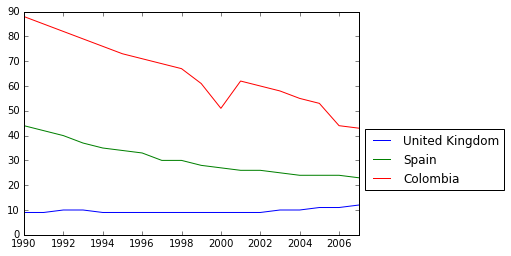

In [47]:
#Let us go ahead and do some plotting
%matplotlib inline
existing_df[['United Kingdom', 'Spain', 'Colombia']].plot().legend(loc='best', bbox_to_anchor=(1, 0.5))
#existing_df[['United Kingdom', 'Spain', 'Colombia']].plot()

C:\Users\tejks\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x5f55c88>,
 'caps': [<matplotlib.lines.Line2D at 0x5f62748>,
 'fliers': [<matplotlib.lines.Line2D at 0x5f67fd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x5f670b8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x5f55e48>,
  <matplotlib.lines.Line2D at 0x5f85ac8>]}

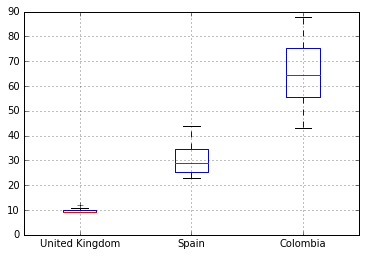

In [48]:
#How about box-plots
existing_df[['United Kingdom', 'Spain', 'Colombia']].boxplot()


In [54]:
#Now let us ask some questions to the data
#Which country has the highest number of existing and new TB cases.
#print (existing_df.head())
#existing_df.apply(pd.Series.argmax, axis=0)

#print (existing_df.apply(pd.Series.argmax, axis=1)) #In each year, which country has the highest number of existing cases
#print (existing_df.apply(pd.Series.argmax, axis=0)) #For every country, which year registered the highest number of existing cases

#print ("This is how the new TB cases are shaping up")
#print (new_df.apply(pd.Series.argmax, axis=1))
print (new_df.apply(pd.Series.argmax, axis=0))


TB incidence, all forms (per 100 000 population per year)
Afghanistan                         1990
Albania                             1997
Algeria                             2007
American Samoa                      1990
Andorra                             1990
Angola                              2007
Anguilla                            1990
Antigua and Barbuda                 1990
Argentina                           1990
Armenia                             2001
Australia                           1990
Austria                             1990
Azerbaijan                          2001
Bahamas                             1990
Bahrain                             1990
Bangladesh                          1990
Barbados                            1990
Belarus                             1999
Belgium                             1990
Belize                              1990
Benin                               2007
Bermuda                             1990
Bhutan                              1990

In [59]:
#What about world trends? 
#What is following code doing?
#print (deaths_df)
deaths_total_per_year_df = deaths_df.sum(axis=1)
existing_total_per_year_df = existing_df.sum(axis=1)
new_total_per_year_df = new_df.sum(axis=1)
#deaths_total_per_year_df
#existing_total_per_year_df
print (deaths_total_per_year_df)
print (existing_total_per_year_df)
print (new_total_per_year_df)


1990    4938
1991    5108
1992    5194
1993    5372
1994    5471
1995    5655
1996    5502
1997    5658
1998    5666
1999    6074
2000    6019
2001    6198
2002    6074
2003    6087
2004    6042
2005    6051
2006    5943
2007    6007
dtype: int64
1990    40772
1991    40669
1992    39912
1993    39573
1994    39066
1995    38904
1996    37032
1997    37462
1998    36871
1999    37358
2000    36747
2001    36804
2002    37160
2003    36516
2004    36002
2005    35435
2006    34987
2007    34622
dtype: int64
1990    21855.0
1991    22288.0
1992    22421.0
1993    22836.0
1994    23177.0
1995    23639.0
1996    23878.0
1997    24608.0
1998    25154.0
1999    25884.0
2000    26464.0
2001    27065.0
2002    28188.0
2003    28192.0
2004    28352.0
2005    28219.0
2006    27999.0
2007    27611.0
dtype: float64


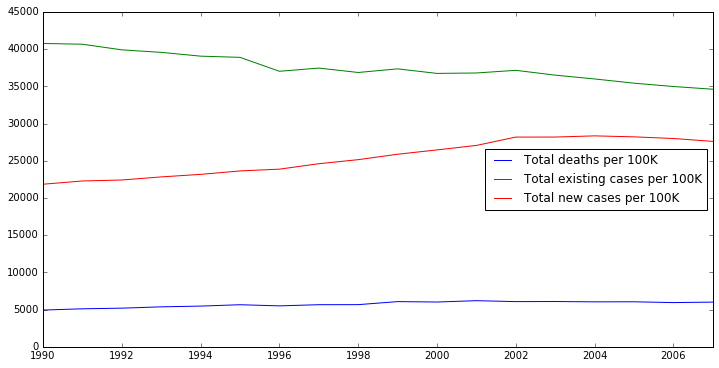

In [70]:
world_trends_df = pd.DataFrame({
           'Total deaths per 100K' : deaths_total_per_year_df, 
           'Total existing cases per 100K' : existing_total_per_year_df, 
           'Total new cases per 100K' : new_total_per_year_df}, 
       index=deaths_total_per_year_df.index)
world_trends_df
world_trends_df.plot(figsize=(12,6)).legend(
   loc='best')

#What inferences can we derive?

In [76]:
#What about specific countries?
deaths_by_country_mean = deaths_df.mean()
#print (deaths_by_country_mean)
deaths_by_country_mean_summary = deaths_by_country_mean.describe()
print (deaths_by_country_mean_summary)
existing_by_country_mean = existing_df.mean()
existing_by_country_mean_summary = existing_by_country_mean.describe()
existing_by_country_mean_summary
new_by_country_mean = new_df.mean()
new_by_country_mean_summary = new_by_country_mean.describe()

count    207.000000
mean      27.659420
std       38.687307
min        0.000000
25%        2.972222
50%        9.666667
75%       41.333333
max      222.166667
dtype: float64


C:\Users\tejks\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


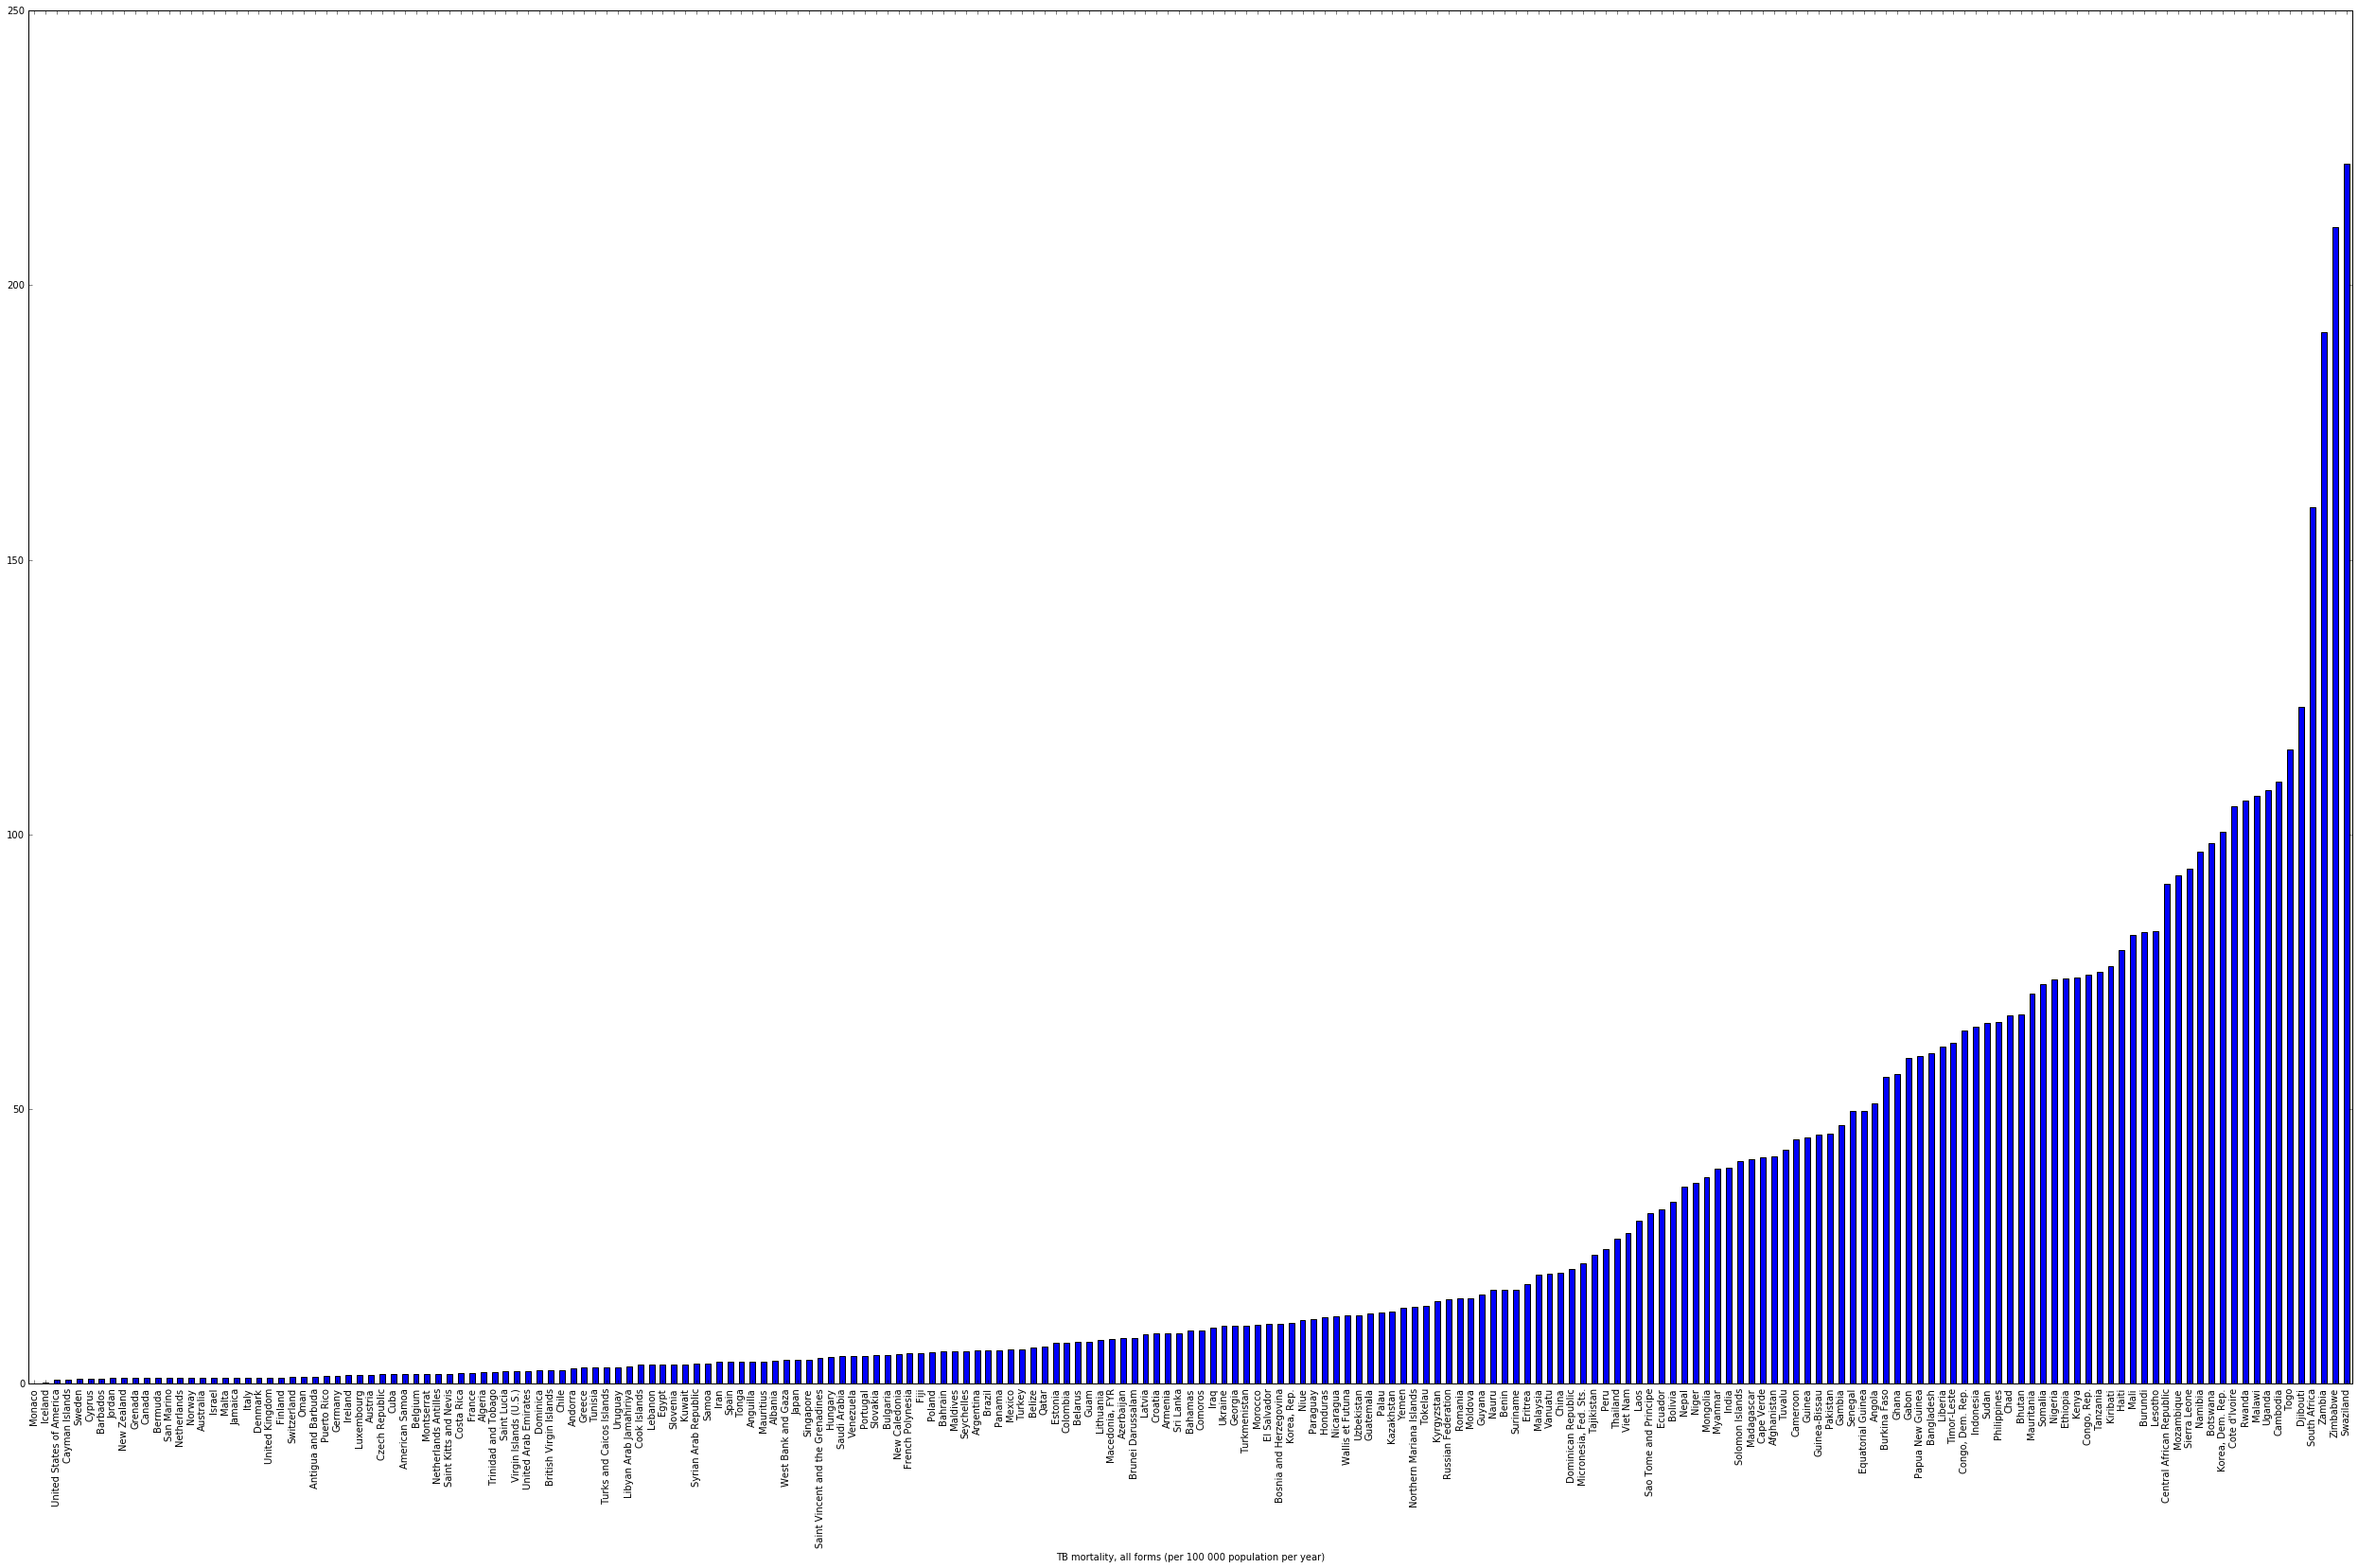

In [77]:
deaths_by_country_mean.order().plot(kind='bar', figsize=(44,26))

In [89]:
#Let us think about outlier countries
deaths_by_country_mean_summary
deaths_outlier = deaths_by_country_mean_summary['50%']*5
print (deaths_by_country_mean_summary['50%']*5)
existing_outlier = existing_by_country_mean_summary['50%']*5
new_outlier = new_by_country_mean_summary['50%']*5

outlier_countries_by_deaths_index = deaths_by_country_mean > deaths_outlier
outlier_countries_by_existing_index =  existing_by_country_mean > existing_outlier
outlier_countries_by_new_index = new_by_country_mean > new_outlier
outlier_countries_by_deaths_index


48.3333333333


TB mortality, all forms (per 100 000 population per year)
Afghanistan                         False
Albania                             False
Algeria                             False
American Samoa                      False
Andorra                             False
Angola                               True
Anguilla                            False
Antigua and Barbuda                 False
Argentina                           False
Armenia                             False
Australia                           False
Austria                             False
Azerbaijan                          False
Bahamas                             False
Bahrain                             False
Bangladesh                           True
Barbados                            False
Belarus                             False
Belgium                             False
Belize                              False
Benin                               False
Bermuda                             False
Bhutan            

In [90]:
#Proportions of countries as outliers
#deaths_df.T
num_countries = len(deaths_df.T)
num_countries
print (num_countries)
sum(outlier_countries_by_deaths_index)
print (sum(outlier_countries_by_deaths_index))
print (sum(outlier_countries_by_existing_index))
print (sum(outlier_countries_by_new_index))

207
45
29
22


In [93]:
#What if you change outlier criteria?
deaths_df.T.head()
#outlier_countries_by_deaths_index

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
"TB mortality, all forms (per 100 000 population per year)",,,,,,,,,,,,,,,,,,
Afghanistan,50,49,48,47,47,46,46,45,43,43,41,39,36,37,34,33,31,30
Albania,4,4,4,4,4,5,5,5,5,5,4,4,4,4,4,4,3,3
Algeria,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
American Samoa,5,2,0,2,2,2,0,9,2,1,1,1,1,0,1,1,1,0
Andorra,4,4,4,4,3,3,3,2,3,3,2,3,3,2,2,2,2,2


In [96]:
#Filter the data frame
outlier_deaths_df = deaths_df.T[ outlier_countries_by_deaths_index ].T
#deaths_df.T[ outlier_countries_by_deaths_index ]
outlier_deaths_df
outlier_existing_df = existing_df.T[ outlier_countries_by_existing_index ].T
outlier_new_df = new_df.T[ outlier_countries_by_new_index ].T

In [97]:
outlier_new_df

"TB incidence, all forms (per 100 000 population per year)",Bhutan,Botswana,Cambodia,"Congo, Rep.",Cote d'Ivoire,"Korea, Dem. Rep.",Djibouti,Kiribati,Lesotho,Malawi,Mozambique,Namibia,Philippines,Rwanda,Sierra Leone,South Africa,Swaziland,Timor-Leste,Togo,Uganda,Zambia,Zimbabwe
1990,540.0,307.0,585.0,169.0,177.0,344.0,582.0,513.0,184.0,258.0,181.0,322.0,393.0,167.0,207.0,301.0,267.0,322.0,308.0,163.0,297.0,329.0
1991,516.0,341.0,579.0,188.0,196.0,344.0,594.0,503.0,201.0,286.0,201.0,357.0,386.0,185.0,220.0,301.0,266.0,322.0,314.0,250.0,349.0,364.0
1992,492.0,364.0,574.0,200.0,209.0,344.0,606.0,493.0,218.0,314.0,214.0,381.0,380.0,197.0,233.0,302.0,260.0,322.0,320.0,272.0,411.0,389.0
1993,470.0,390.0,568.0,215.0,224.0,344.0,618.0,483.0,244.0,343.0,230.0,409.0,373.0,212.0,248.0,305.0,267.0,322.0,326.0,296.0,460.0,417.0
1994,449.0,415.0,563.0,229.0,239.0,344.0,630.0,474.0,280.0,373.0,245.0,435.0,366.0,225.0,263.0,309.0,293.0,322.0,333.0,306.0,501.0,444.0
1995,428.0,444.0,557.0,245.0,255.0,344.0,642.0,464.0,323.0,390.0,262.0,465.0,360.0,241.0,279.0,317.0,337.0,322.0,339.0,319.0,536.0,474.0
1996,409.0,468.0,552.0,258.0,269.0,344.0,655.0,455.0,362.0,389.0,276.0,491.0,353.0,254.0,297.0,332.0,398.0,322.0,346.0,314.0,554.0,501.0
1997,391.0,503.0,546.0,277.0,289.0,344.0,668.0,446.0,409.0,401.0,297.0,527.0,347.0,273.0,315.0,360.0,474.0,322.0,353.0,320.0,576.0,538.0
1998,373.0,542.0,541.0,299.0,312.0,344.0,681.0,437.0,461.0,412.0,320.0,568.0,341.0,294.0,334.0,406.0,558.0,322.0,360.0,326.0,583.0,580.0
1999,356.0,588.0,536.0,324.0,338.0,344.0,695.0,428.0,519.0,417.0,347.0,616.0,335.0,319.0,355.0,479.0,691.0,322.0,367.0,324.0,603.0,628.0


In [98]:
#What do you infer from above dataset? Can we somehow combine all of that information?
#print (outlier_new_df)
average_outlier_country = outlier_new_df.mean(axis=1)
average_outlier_country

1990    314.363636
1991    330.136364
1992    340.681818
1993    352.909091
1994    365.363636
1995    379.227273
1996    390.863636
1997    408.000000
1998    427.000000
1999    451.409091
2000    476.545455
2001    502.409091
2002    525.727273
2003    543.318182
2004    548.909091
2005    546.409091
2006    540.863636
2007    535.181818
dtype: float64

In [100]:
#Compare this with rest of world
new_df.T[ - outlier_countries_by_new_index]
average_better_world_country = new_df.T[ - outlier_countries_by_new_index ].T.mean(axis=1)
average_better_world_country

1990    80.751351
1991    81.216216
1992    80.681081
1993    81.470270
1994    81.832432
1995    82.681081
1996    82.589189
1997    84.497297
1998    85.189189
1999    86.232432
2000    86.378378
2001    86.551351
2002    89.848649
2003    87.778378
2004    87.978378
2005    87.086022
2006    86.559140
2007    85.605405
dtype: float64

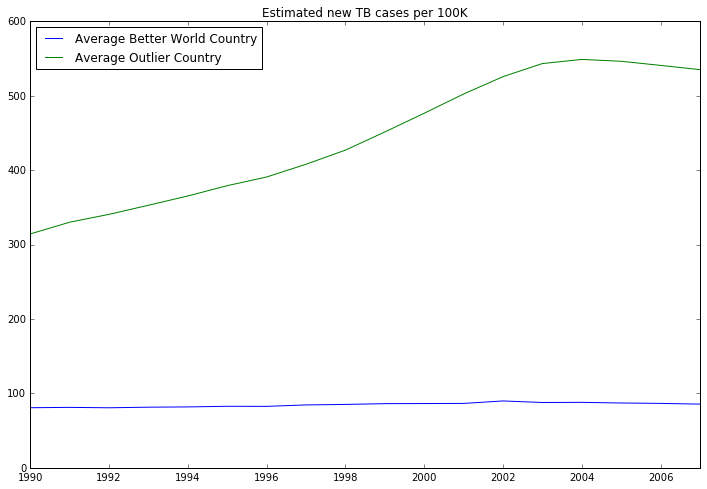

In [101]:
two_world_df = pd.DataFrame({ 
            'Average Better World Country': average_better_world_country,
            'Average Outlier Country' : average_outlier_country},
        index = new_df.index)
two_world_df.plot(title="Estimated new TB cases per 100K",figsize=(12,8))

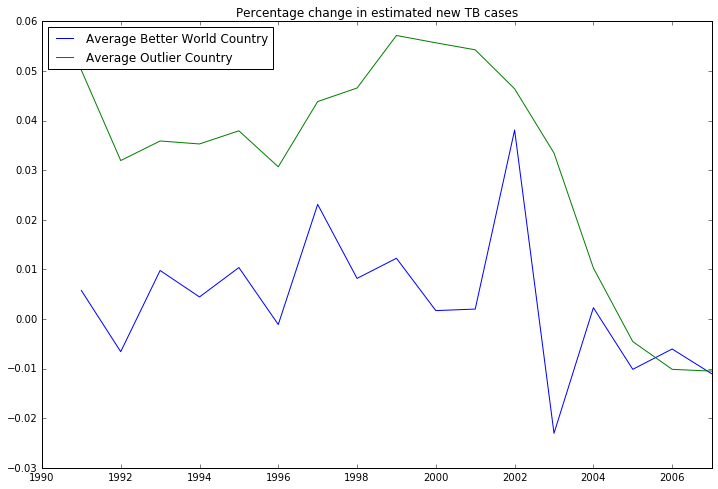

In [102]:
two_world_df.pct_change().plot(title="Percentage change in estimated new TB cases", figsize=(12,8))
#What do you infer here?

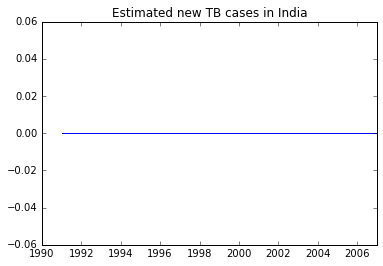

In [105]:
new_df.pct_change().India.plot(title="Estimated new TB cases in India")


In [104]:
new_df.apply(pd.Series.argmax, axis=1)['2007']


'Swaziland'